<a href="https://colab.research.google.com/github/abhiramangit/CNN_Exercises/blob/master/Batch_Nonrm_DropOuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
import numpy as np
import torchvision 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import torchvision.transforms as transforms


In [65]:
train_set = torchvision.datasets.MNIST(root= "./data",train=True,transform=transforms.ToTensor(),download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [66]:
## get an iterable of defined batch size 
bat_size = 4
train_loader = torch.utils.data.DataLoader(train_set,batch_size=bat_size,shuffle = True)
print(train_loader)

In [67]:
iter_data = iter(train_loader)
img,ind = iter_data.next()
print(img.shape)
print(ind)
print(img[0].shape)
detached_img = img.numpy()
print(detached_img)




torch.Size([4, 1, 28, 28])
tensor([2, 1, 9, 7])
torch.Size([1, 28, 28])
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]


In [68]:
## Visualizing the Image 
def show_single_or_grid_image(image,label,grid=False):
  if grid:
    transpose_img = np.transpose(image,(1,2,0))
    plt.imshow(transpose_img)
    plt.title(label,{'fontsize':14,'fontweight':"bold"})

  else:
    numpy_image = image.numpy()
    print(numpy_image.shape)
    numpy_image = numpy_image.transpose()[:,:,-1]
    print(numpy_image.shape)

    plt.imshow(numpy_image)
    plt.title(label.item(),{'fontsize':14,'fontweight':"bold"})
    plt.pause(2)


(1, 28, 28)
(28, 28)


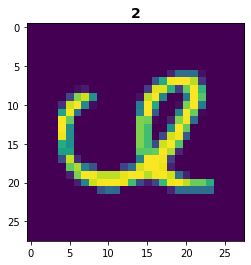

(1, 28, 28)
(28, 28)


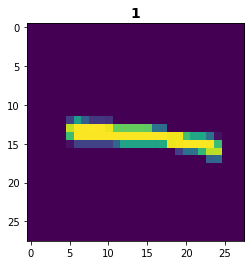

(1, 28, 28)
(28, 28)


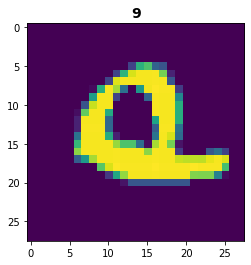

(1, 28, 28)
(28, 28)


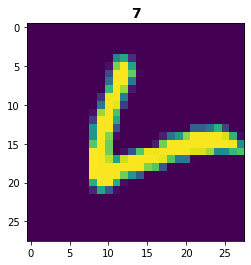

In [69]:
for e_image,e_label in zip(img,ind):
  show_single_or_grid_image(e_image,e_label)

In [70]:
## Grid Images 
def batch_image_show(data_loader):
  img,label = iter(data_loader).next()
  img_grid = torchvision.utils.make_grid(img,bat_size,normalize=True)
  show_single_or_grid_image(img_grid,[e_label.item() for e_label in label],grid=True)

  

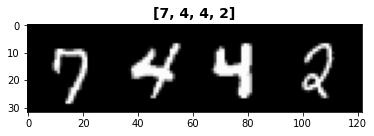

In [71]:
for i in range(5):
  batch_image_show(train_loader)

# 1DBatchNorm Implementation 


1.   normalization can be done before activation function or post applying activation function
2.   normalizing in hidden layers can avoid too much fluctuations in weight updation, as weights/parameters are maintained within a small domain






---



In [72]:
## Directly Start from classifier layer
class simple_net(nn.Module):
  def __init__(self):
    super(simple_net,self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784,64),
        nn.ReLU(),
        nn.Linear(64,36),
        nn.ReLU(),
        nn.Linear(36,10)
    )

  def forward(self,x):
    x = x.view(x.size(0), -1)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [73]:
obj = simple_net()
print(obj)
#obj.forward(img)

simple_net(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=10, bias=True)
  )
)


In [80]:
## Classifier model havig Batch Normalization
class bn_net(nn.Module):
  def __init__(self):
    super(bn_net,self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        
        nn.Linear(64,36),
        nn.BatchNorm1d(36),
        nn.ReLU(),

        nn.Linear(36,10),
        nn.BatchNorm1d(10),
        nn.ReLU()
    )
  
  def forward(self,x):
    x = x.reshape((x.shape[0],-1))
    #print("haa:",x.shape)
    x = self.classifier(x)
    return x

  


In [81]:
obj1 = bn_net()
print(obj1)
#ret = obj1.forward(img)
#print(ret)

bn_net(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=36, bias=True)
    (4): BatchNorm1d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=10, bias=True)
    (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
)


In [82]:
## Since Grey Scale Image, higher Batch Size can be chosen
bat_size_1 = 512

In [83]:
## To Make a new train set loader for new batch size 
train_loader = torch.utils.data.DataLoader(train_set,batch_size=bat_size_1,shuffle=True)

In [84]:
## To define loss and optimization function 
loss_func = nn.CrossEntropyLoss()
opt = optim.SGD(obj.parameters(),lr=0.01)
opt_bn = optim.SGD(obj1.parameters(),lr=0.01)

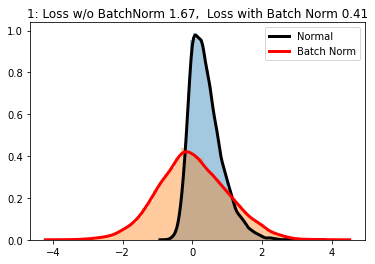

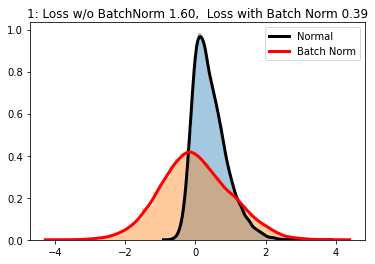

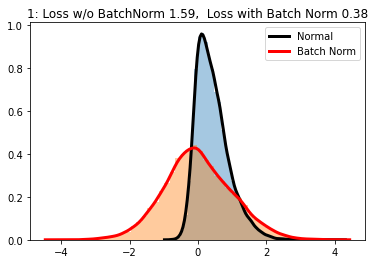

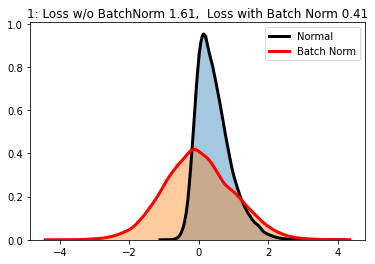

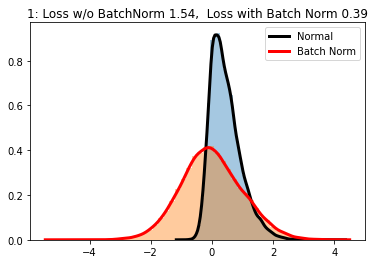

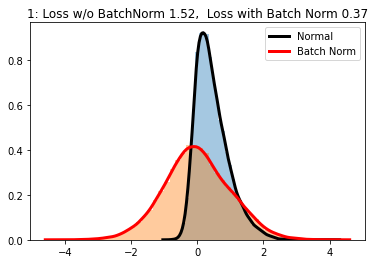

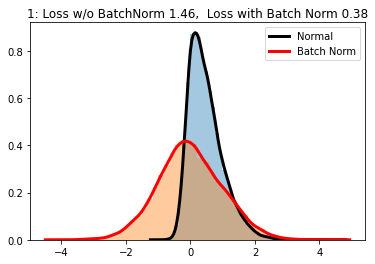

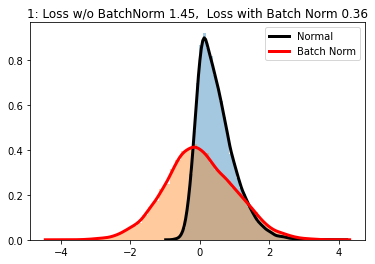

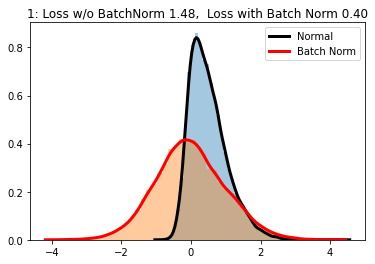

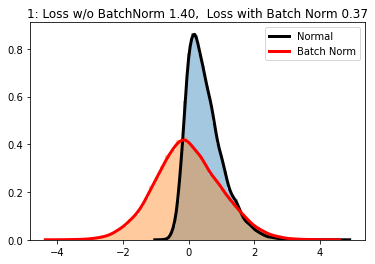

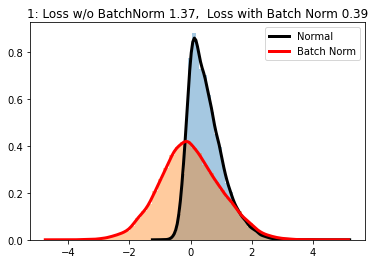

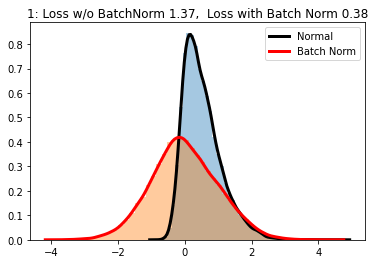

--------------------------------------------------


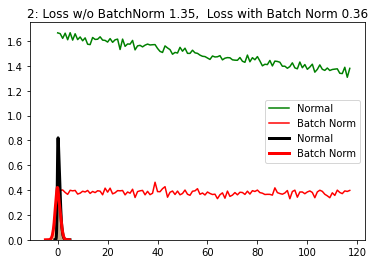

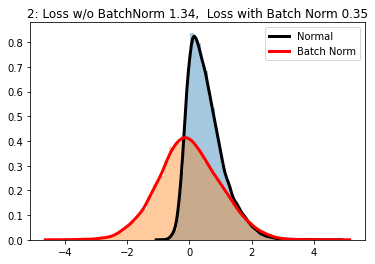

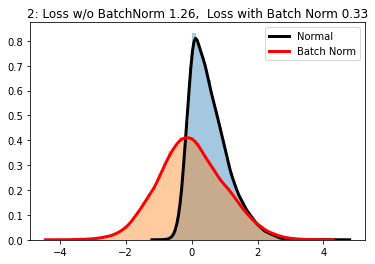

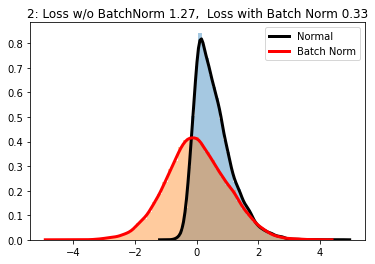

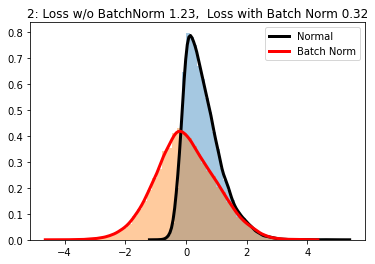

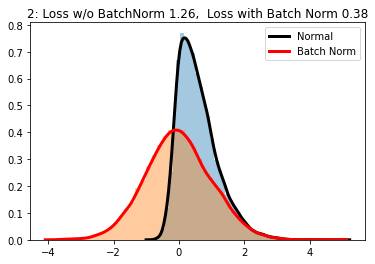

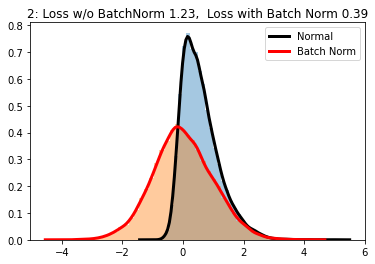

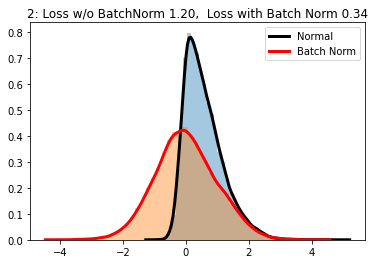

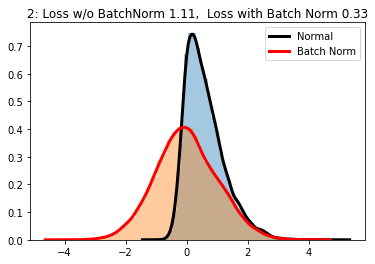

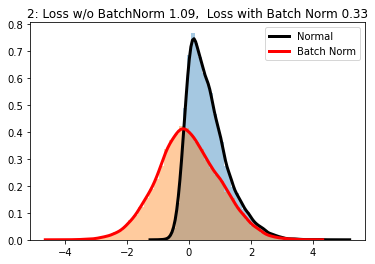

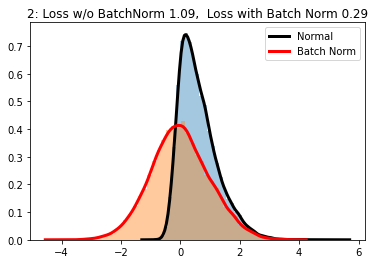

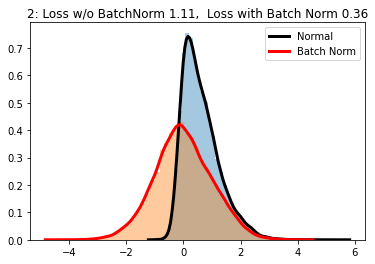

--------------------------------------------------


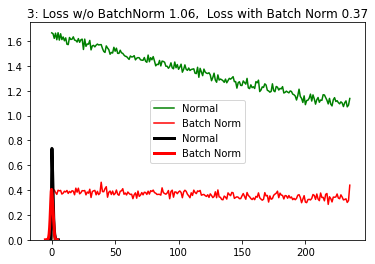

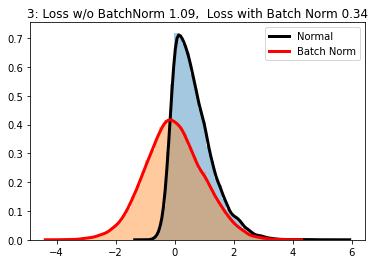

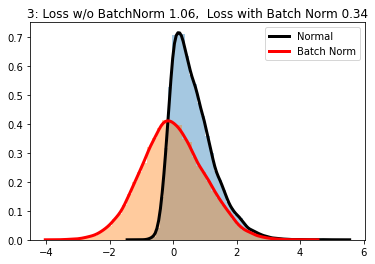

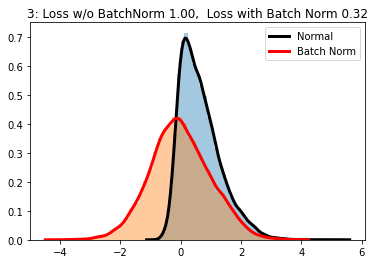

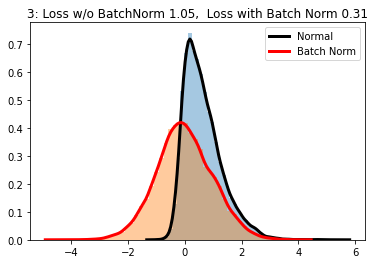

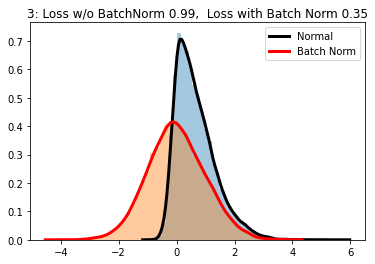

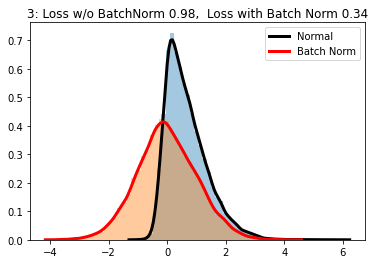

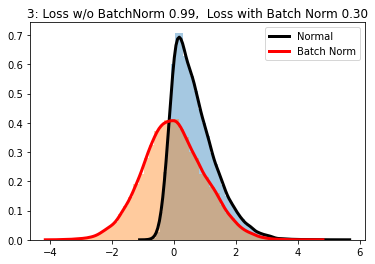

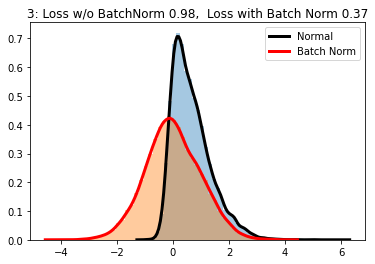

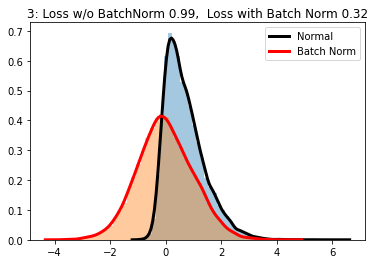

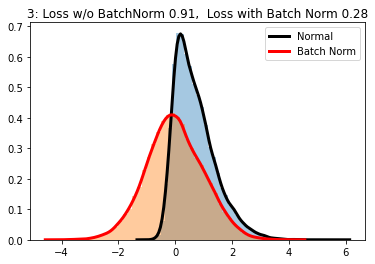

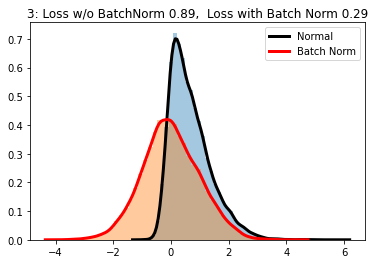

--------------------------------------------------


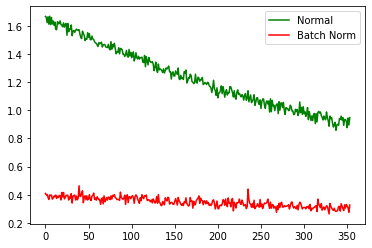

In [87]:
## To Train the Model, plot loss for simple network & batch norm network , plot batch norm output in batch norm newtwork & corresponding output in simple network
## Intrested in weights/parametrs updatation and not gradient storage. So after each epoch, gradients are set to zero 
loss_simple,loss_bn = [],[]
for i in range(3):
  for ind,data in enumerate(train_loader):
    img,label = data

    ## Training steps for simple model 
    opt.zero_grad()
    ff = obj.forward(img)
    loss_sl = loss_func(ff,label)
    loss_sl.backward()
    opt.step()

    ## Training steps for batch norm model
    opt_bn.zero_grad()
    ff_bn = obj1.forward(img)
    loss_bnorm = loss_func(ff_bn,label)
    loss_bnorm.backward()
    opt_bn.step()

    loss_simple.append(loss_sl.item())
    loss_bn.append(loss_bnorm.item())

    if ind%10 == 0:
      inputs = img.reshape(img.shape[0],-1)

      ## Setting to Evaluation mode ( No Parameter updation will be there, will be using updted parameters till now )
      obj.eval()
      obj1.eval()

      a = obj.classifier[0](inputs)
      a = a.detach().numpy().ravel()
      b = obj1.classifier[0](inputs)
      bb = obj1.classifier[1](b)
      bb = bb.detach().numpy().ravel()

      sns.distplot(a,kde=True,kde_kws={'color':'black','lw':3,'label':"Normal"})
      sns.distplot(bb,kde=True,kde_kws={'color':'red','lw':3,'label':"Batch Norm"})

      plt.title("%d: Loss w/o BatchNorm %0.2f,  Loss with Batch Norm %.2f"%(i+1,loss_sl.item(),loss_bnorm.item()))
      plt.legend()
      plt.show()
      plt.pause(1)

      ## Setting back to train mode
      obj.train()
      obj1.train()
    
  print('-'*50)
  plt.plot(loss_simple,color = 'g',label='Normal')
  plt.plot(loss_bn,color = 'r',label = "Batch Norm")
  #plt.title(" %d Epochs,  %.2f Loss w/o norm, %.2f with batch norm".%(i,loss_sl.item(),loss_bn.item()))
  plt.legend()
  plt.show
    
## Conclusions :
#1) batchnorm reduces the loss at a faster rate 
#2) Weights/Parameters have constant curves , so prarameters are restricted to a fixed domain 

# Drop Out Effect Visualization


1.   creating variety of NN from a given main network, by switching off few neurons. 
2.  Dropout prevents co-adaptation & exposes many neurons to learn, than a single neuron specializing to learn a particular feature. This ensures robustness in model 

In [46]:
N = 100
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1,1,N),1)
Y_train = X_train + noise*torch.normal(torch.zeros(N,1),torch.ones(N,1))
print(X_train.shape)
#print(Y_train)

X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

torch.Size([100, 1])


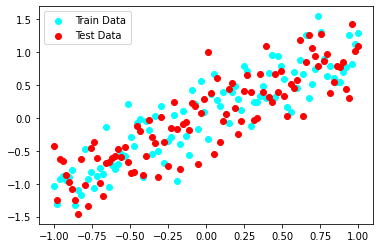

In [47]:
## Plotting train & test data
plt.scatter(X_train.data.numpy(),Y_train.data.numpy(),c = "cyan",label = "Train Data")
plt.scatter(X_test.data.numpy(),Y_test.data.numpy(),c = "red",label = "Test Data")
plt.legend()
plt.show()

In [54]:
class model_net(nn.Module):
  def __init__(self):
    super(model_net,self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(1,100),
        nn.Tanh(),
        nn.Linear(100,100),
        nn.Tanh(),
        nn.Linear(100,1),
    )

  def forward(self,x):
    x = x.reshape(x.shape[0],-1)
    x = self.classifier(x)
    return x 

In [55]:
obj_simple = model_net()

In [59]:
class model_drop_net(nn.Module):
  def __init__(self):
    super(model_drop_net,self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(1,100),
        nn.Dropout(0.2), ## Lower Dropout Probablity , Less neurons switched off in 1st Hidden Layer
        nn.ReLU(),
        nn.Linear(100,100),
        nn.Dropout(0.8),    ## Higher Dropout Probability (50% Drop of neurons)
        nn.ReLU(),
        nn.Linear(100,1)
    )

  def forward(self,x):
    x = x.reshape(x.shape[0],-1)
    x = self.classifier(x)
    return x

In [61]:
obj_drop = model_drop_net()

In [62]:
## Loss & optimization Function 
loss_fn = nn.MSELoss()
opt_simple = optim.SGD(obj_simple.parameters(),lr =0.01)
opt_drop = optim.SGD(obj_drop.parameters(),lr=0.01)


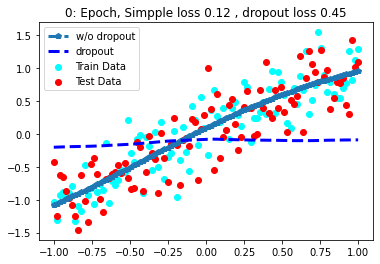

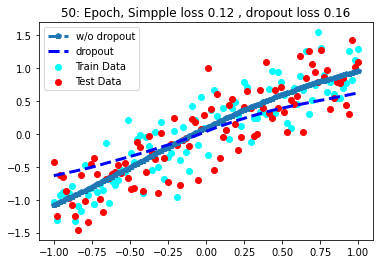

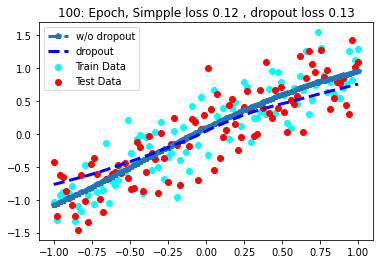

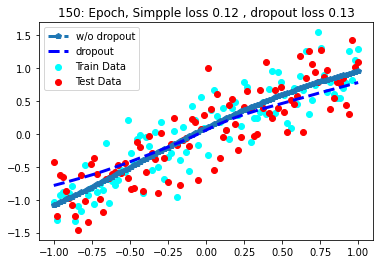

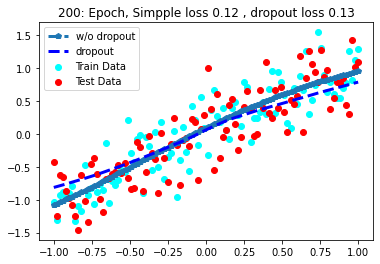

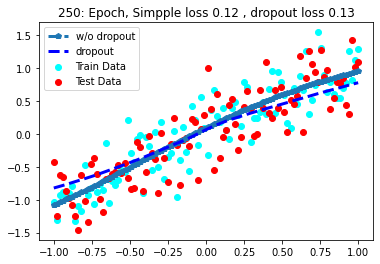

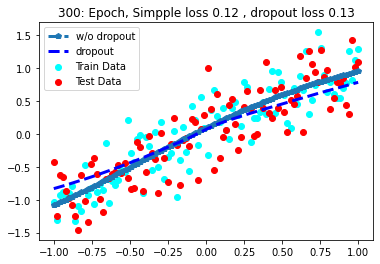

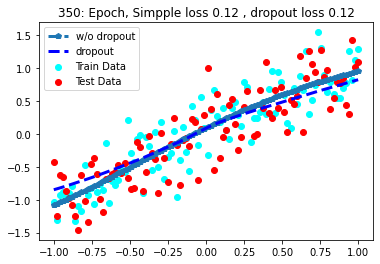

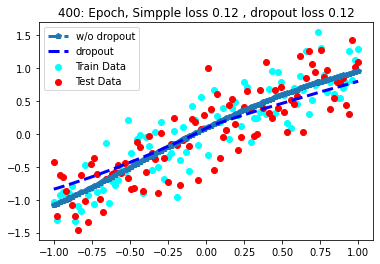

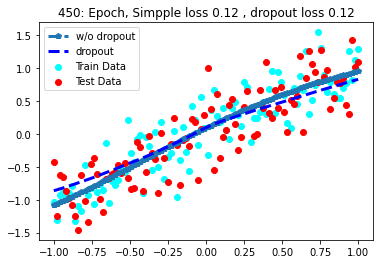

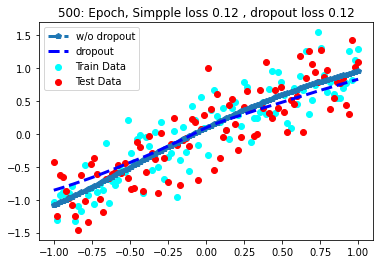

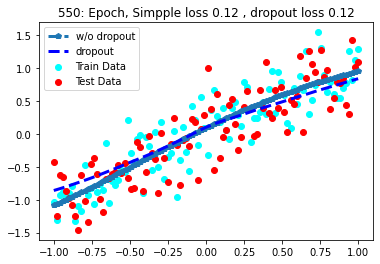

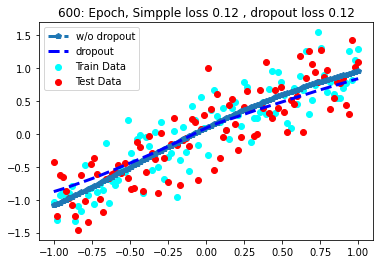

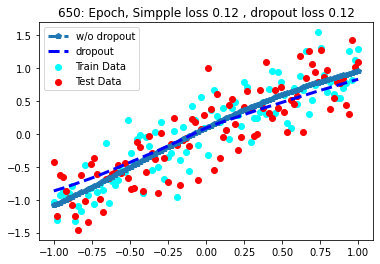

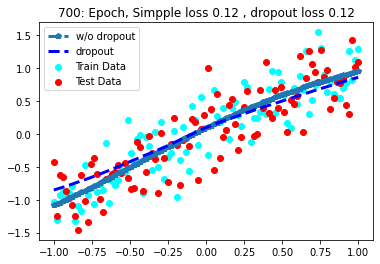

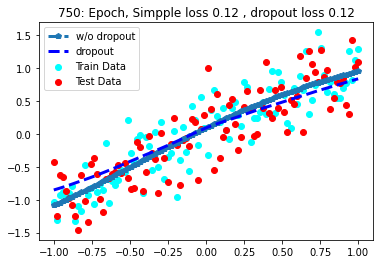

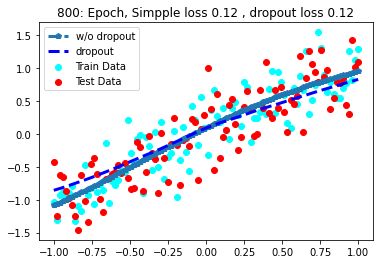

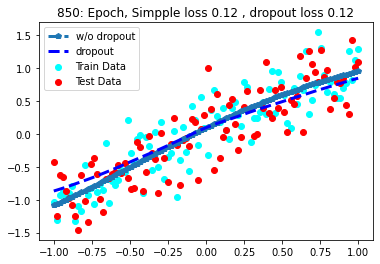

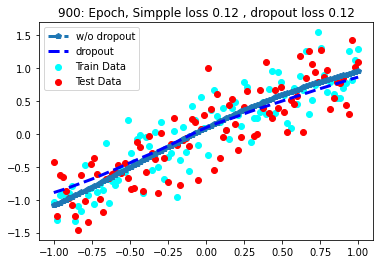

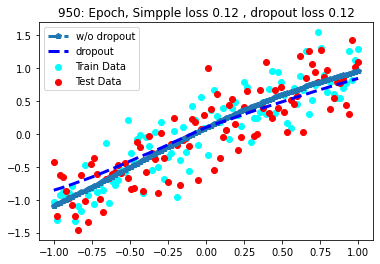

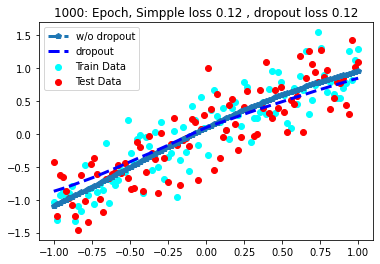

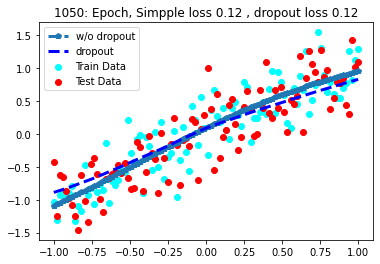

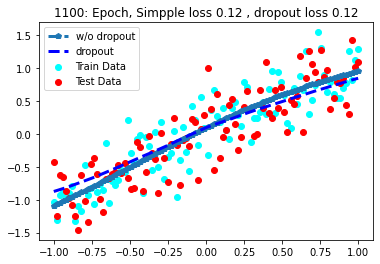

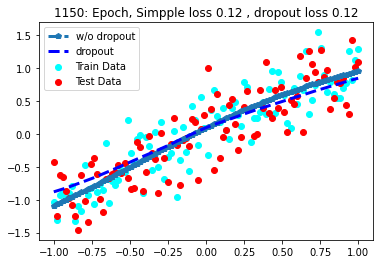

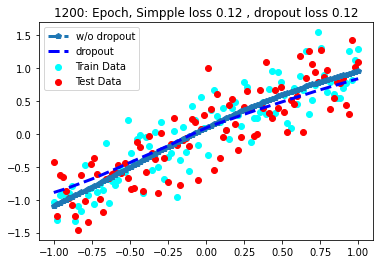

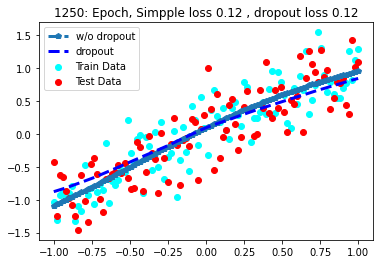

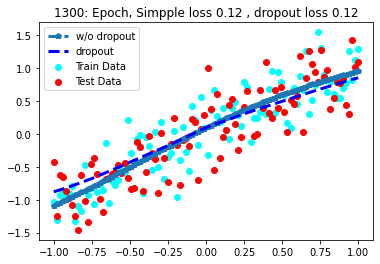

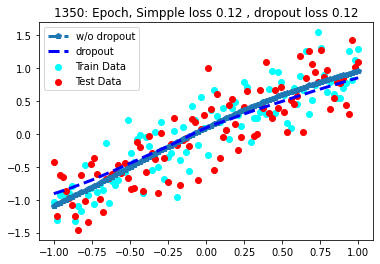

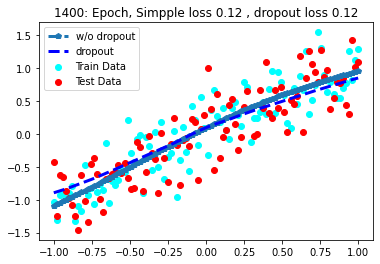

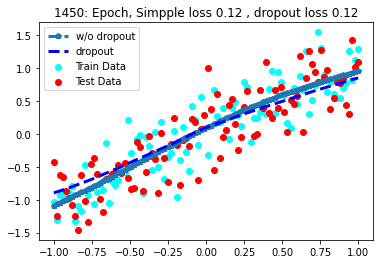

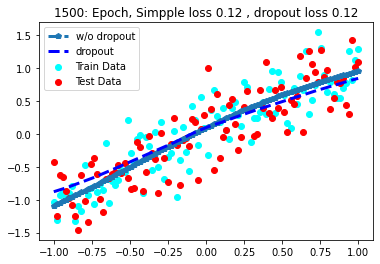

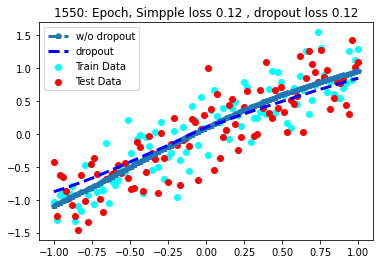

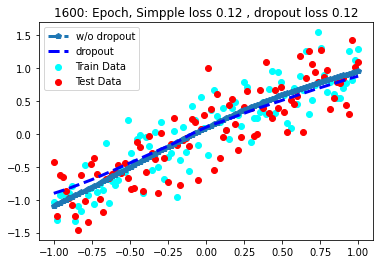

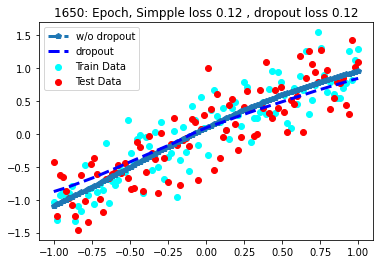

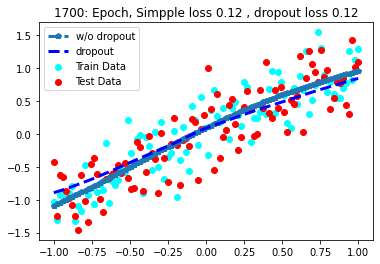

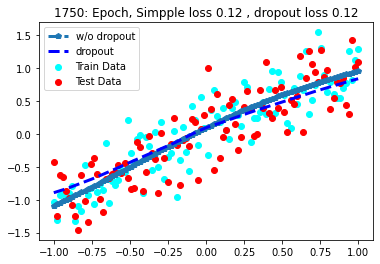

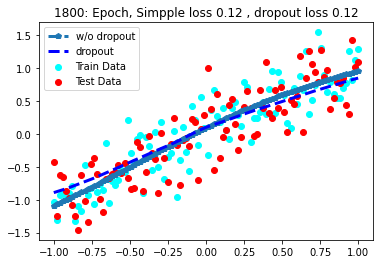

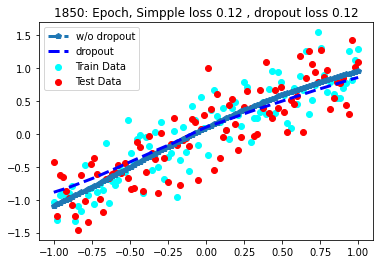

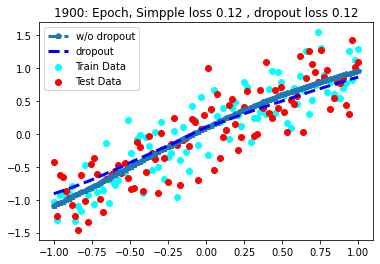

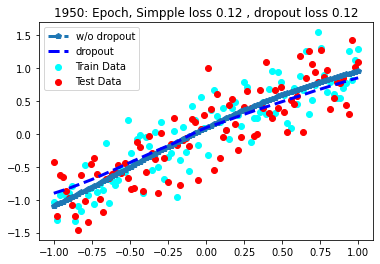

In [63]:
## Training the model 
epochs = 2000
for i in range(epochs):

  opt_simple.zero_grad()
  ff = obj_simple.forward(X_train)
  loss = loss_fn(ff,Y_train)
  loss.backward()
  opt_simple.step()

  opt_drop.zero_grad()
  ff1 = obj_drop.forward(X_train)
  loss_dp = loss_fn(ff1,Y_train)
  loss_dp.backward()
  opt_drop.step()

  if i%50==0:
    obj_simple.eval()
    obj_drop.eval()

    y_simple_pred = obj_simple.forward(X_test)
    
    #print(y_simple_pred)
    loss_simple = loss_fn(y_simple_pred,Y_test)
    y_simple_pred = y_simple_pred.detach().numpy().ravel()
    y_simple_pred = y_simple_pred.reshape(y_simple_pred.shape[0],1)
    y_drop_pred = obj_drop.forward(X_test)
    #print(y_drop_pred)
    loss_drop = loss_fn(y_drop_pred,Y_test)
    y_drop_pred = y_drop_pred.detach().numpy().ravel()
    y_drop_pred = y_drop_pred.reshape(y_drop_pred.shape[0],1)
    #print(X_test.data.numpy())
    #print(y_simple_pred)

    plt.scatter(X_train.data.numpy(),Y_train.data.numpy(),c='cyan',label = "Train Data")
    plt.scatter(X_test.data.numpy(),Y_test.data.numpy(),c='red',label = "Test Data")
    plt.plot(X_test.data.numpy(),y_simple_pred,'p--',lw=3,label="w/o dropout")
    plt.plot(X_train.data.numpy(),y_drop_pred,'b--',lw=3,label="dropout")
    plt.title("%d: Epoch, Simpple loss %.2f , dropout loss %.2f"%(i,loss_simple.item(),loss_drop.item()))
    plt.legend()
    plt.show()
    plt.pause(1)

    obj_simple.train()
    obj_drop.train()


